In [211]:
# импортируем библиотеки
import pandas as pd
import csv
from datetime import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# загружаем файл
df=pd.read_csv('TradeLog20150302.txt', delimiter=',')
df.head()

# считаем open, close, low, high, volume в каждую секунду
df_price=pd.DataFrame(index=df.groupby(['SECCODE', 'TIME']).max().index)
df_price['OPEN']=df[['SECCODE','TIME', 'PRICE']].groupby(['SECCODE','TIME']).first()
df_price['CLOSE']=df[['SECCODE','TIME', 'PRICE']].groupby(['SECCODE','TIME']).last()
df_price['LOW']=df[['SECCODE','TIME', 'PRICE']].groupby(['SECCODE','TIME']).min()
df_price['HIGH']=df[['SECCODE','TIME', 'PRICE']].groupby(['SECCODE','TIME']).max()
df_price['VOLUME']=df[['SECCODE','TIME', 'VOLUME']].groupby(['SECCODE','TIME']).sum()
df_price.head()

# сохраняем созданый файл в формате csv
df_price.to_csv('trade_info.csv', sep=',')

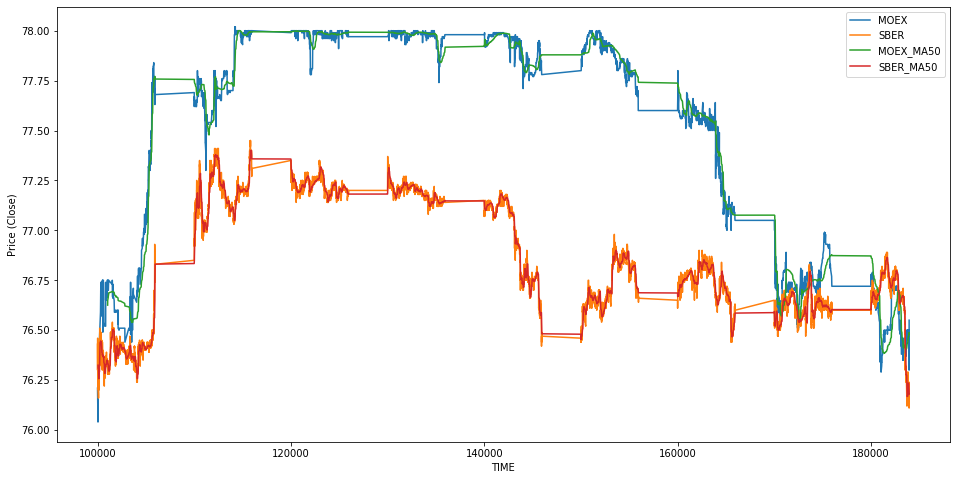

In [212]:
# Отберем по коду инструмента SECCODE MOEX и SBER для сравнения (MOEX и SBER можно заменить на любые другие и подставить ниже)
df_price_MOEX=pd.read_csv('trade_info.csv', delimiter=',')
df_MOEX=df_price_MOEX[(df_price_MOEX['SECCODE']=='MOEX')].copy()
df_MOEX.head()

df_price_SBER=pd.read_csv('trade_info.csv', delimiter=',')
df_SBER=df_price_SBER[(df_price_SBER['SECCODE']=='SBER')].copy()
df_SBER.head()

# Визуализация котировок акций со средним (MA 50)
df_MOEX.set_index('TIME')['CLOSE'].plot(label='MOEX',figsize=(16,8))
df_SBER.set_index('TIME')['CLOSE'].plot(label='SBER',figsize=(16,8))
df_MOEX.set_index('TIME')['MA50'] = df_MOEX.set_index('TIME')['CLOSE'].rolling(50).mean().plot(label='MOEX_MA50',figsize=(16,8))
df_SBER.set_index('TIME')['MA50'] = df_SBER.set_index('TIME')['CLOSE'].rolling(50).mean().plot(label='SBER_MA50',figsize=(16,8))
plt.legend()
plt.ylabel('Price (Close)')
plt.show()

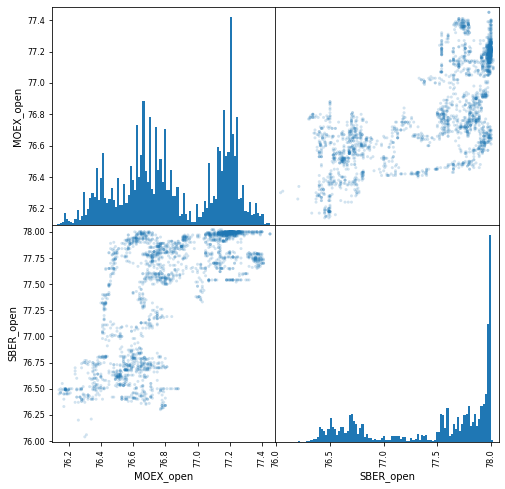

In [214]:
# Посмотрим на корреляцию MOEX и SBER
# Создадим новую таблицу с ценами OPEN по двум акциям и выведем его
# добавив прозрачность (alpha=0,2), чтобы видеть наложение точек
table_corr= pd.concat([df_SBER.set_index('TIME')['OPEN'], df_MOEX.set_index('TIME')['OPEN']], axis=1)
table_corr.columns=['MOEX_open', 'SBER_open']
# print(table_corr)
scatter_matrix(table_corr,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100})
plt.show()
# Если точки идут по диагонали, то наблюдается корреляция

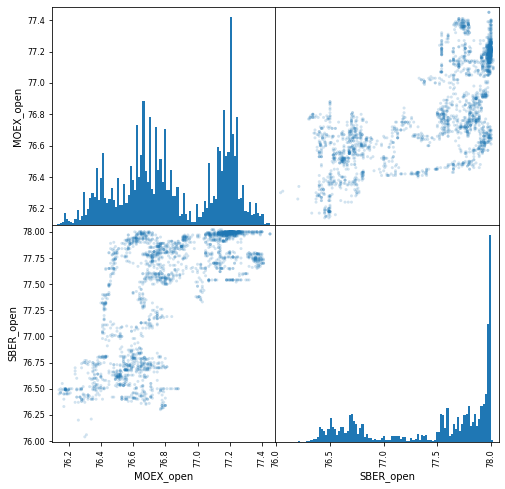

In [215]:
scatter_matrix(table_corr,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100})
plt.show()